In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
allProductDf = pd.read_csv('./allProduct.csv')

In [3]:
allProductDf.head()

,Unnamed: 0,price,freight_value,review_score,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_installments,payment_value,encodedCategory,category_count,TargetVar,Days_to_deliver
0,0,58.9,13.29,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,2,72.19,20,3999,1,15.625671
1,1,55.9,17.96,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,1,73.86,20,3999,1,27.505324
2,2,64.9,18.33,4,4.0,650.0,28.0,9.0,14.0,cool_stuff,2,83.23,20,3999,1,19.565359
3,3,58.9,16.17,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,3,75.07,20,3999,1,23.223125
4,4,58.9,13.29,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,4,72.19,20,3999,1,21.091204


In [4]:
allProductDf.TargetVar.value_counts()

1    114431
0       553
Name: TargetVar, dtype: int64

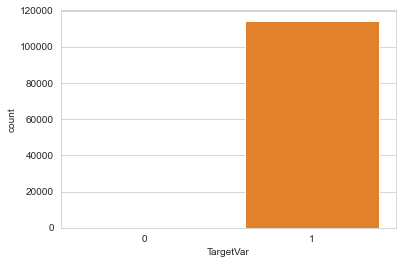

In [5]:
allProductDf.TargetVar.unique()
sns.set_style('whitegrid')
sns.countplot(x='TargetVar',data=allProductDf)

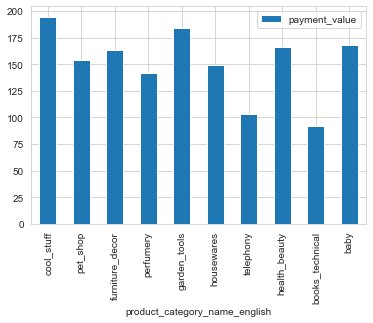

In [6]:
allProductDf.groupby('product_category_name_english',sort=False)[['payment_value']].mean()[:10].plot(kind="bar")

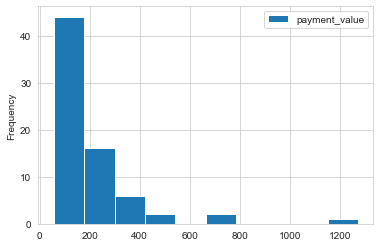

In [7]:
allProductDf.groupby('product_category_name_english',sort=False)[['payment_value']].mean().plot(kind="hist",bins=10)

Looking at bar graph it shows cool stuff has the highest price ,while histogram shows that maximum products has the price less than 100

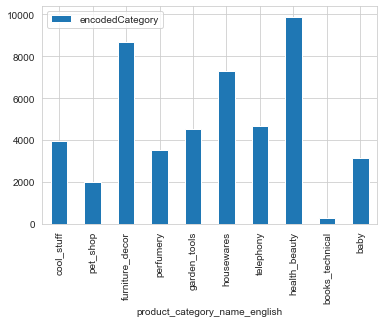

In [8]:
allProductDf.groupby('product_category_name_english',sort=False)[['encodedCategory']].count()[:10].plot(kind="bar")

Most common category in the dataset is health beauty

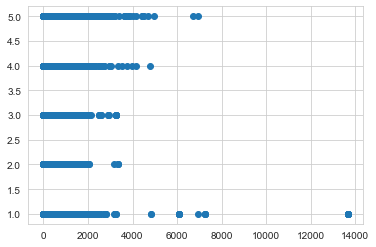

In [9]:
plt.scatter(allProductDf.payment_value,allProductDf.review_score)

In [10]:
allProductDf=allProductDf.drop(['product_category_name_english','Unnamed: 0'], axis=1)



In [11]:
allProductDf.head()

,price,freight_value,review_score,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_installments,payment_value,encodedCategory,category_count,TargetVar,Days_to_deliver
0,58.9,13.29,5,4.0,650.0,28.0,9.0,14.0,2,72.19,20,3999,1,15.625671
1,55.9,17.96,5,4.0,650.0,28.0,9.0,14.0,1,73.86,20,3999,1,27.505324
2,64.9,18.33,4,4.0,650.0,28.0,9.0,14.0,2,83.23,20,3999,1,19.565359
3,58.9,16.17,5,4.0,650.0,28.0,9.0,14.0,3,75.07,20,3999,1,23.223125
4,58.9,13.29,5,4.0,650.0,28.0,9.0,14.0,4,72.19,20,3999,1,21.091204


In [12]:
allProductDf=allProductDf.dropna()

In [69]:
X=allProductDf.drop(['payment_installments','TargetVar','encodedCategory','price'], axis=1)

In [70]:
Y=allProductDf['TargetVar']

In [71]:

from imblearn.under_sampling import NearMiss

In [72]:
nm=NearMiss()
X_nm,Y_nm=nm.fit_sample(X,Y)

In [73]:
print("Number of 0 in under sampled dataset: {}".format(sum(Y_nm == 0))) 
print("Number of 1 in under sampled dataset: {}".format(sum(Y_nm == 1))) 

Number of 0 in under sampled dataset: 553
Number of 1 in under sampled dataset: 553


In [74]:
X_nm.head()

,freight_value,review_score,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,category_count,Days_to_deliver
0,21.10,5,1.0,1383.0,50.0,10.0,40.0,108.00,11990,23.389641
1,15.38,1,1.0,200.0,16.0,12.0,11.0,55.28,7380,13.396435
2,9.98,1,1.0,173.0,18.0,13.0,12.0,90.98,8151,9.419051
3,15.38,1,1.0,173.0,18.0,13.0,12.0,105.17,8151,27.405382
4,8.33,1,1.0,321.0,19.0,14.0,13.0,93.22,8151,23.039942


In [75]:
undersampledDf=pd.concat([X_nm, Y_nm], axis=1)

In [76]:
undersampledDf.shape

(1106, 11)

In [77]:
from pandas_profiling import ProfileReport

In [78]:
profile=ProfileReport(undersampledDf,title='Dataset Profiling Report',explorative=True)

In [80]:
profile.to_widgets()

In [81]:
profile.to_file('undersampledEDA.html')


Positive Correlations: encoded category, review score and photos quantity are positively correlated. Higher these values are, the more likely the product will be sold.

Negative Correlation : Rest all features has negative correlation to the target variable.Lower the values are ,more likely to get sold.

Spilitting undersampled data for training and cross validation and main datasert for testing purpose only 

Payment feature has high correlation with price.Hence dropping the Price feature

In [82]:
from sklearn.model_selection import train_test_split


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0,stratify=Y)

In [84]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_nm, Y_nm, test_size=0.30, random_state=0)

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [91]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()

In [92]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 

In [93]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

In [94]:
model=[rf,logReg,gnb,svm]

In [95]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [96]:
for model in model:
    model.fit(X_train_us,y_train_us)
    y_pred=model.predict(X_test_us)
    print("Model name :{}".format(model))
    print(classification_report(y_test_us, y_pred))
    print(confusion_matrix(y_test_us, y_pred))
    print(accuracy_score(y_test_us, y_pred))
    
    

Model name :RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       152
           1       0.97      0.96      0.97       180

    accuracy                           0.96       332
   macro avg       0.96      0.96      0.96       332
weighted avg       0.96      0.96      0.96       332

[[147   5]
 [  7 173]]
0.963855421686747
Model name :LogisticRegression()
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       152
           1       0.89      0.93      0.91       180

    accuracy                           0.90       332
   macro avg       0.91      0.90      0.90       332
weighted avg       0.90      0.90      0.90       332

[[132  20]
 [ 12 168]]
0.9036144578313253
Model name :GaussianNB()
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       152
           1       0.81      0.98      0.89       180

    

C:\Users\shiva\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model name :SVC(kernel='linear')
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       152
           1       0.92      0.88      0.90       180

    accuracy                           0.89       332
   macro avg       0.89      0.90      0.89       332
weighted avg       0.90      0.89      0.89       332

[[138  14]
 [ 21 159]]
0.8945783132530121


From all the above models Random Forest has the best performance

In [97]:
from sklearn.model_selection import cross_validate

In [98]:
cv_score_SVM=cross_validate(svm,X_train_us,y=y_train_us,cv=5,scoring='accuracy')
print("Mean accuracy score for SVM :{}".format(cv_score_SVM['test_score'].mean()))

Mean accuracy score for SVM :0.8630666108085464


In [99]:
cv_score_rf=cross_validate(rf,X_train_us,y=y_train_us,cv=5,scoring='accuracy')

In [100]:
print("Mean accuracy score for Random forest :{}".format(cv_score_rf['test_score'].mean()))

Mean accuracy score for Random forest :0.9418768328445747


In [101]:
rf_features=pd.DataFrame(rf.feature_importances_)
rf_features['Features']=list(X_train_us)
print(rf_features.sort_values(by=0,ascending=False).head(20))

          0            Features
3  0.319372    product_weight_g
1  0.196056        review_score
8  0.107623      category_count
4  0.105931   product_length_cm
7  0.069329       payment_value
9  0.056196     Days_to_deliver
5  0.051657   product_height_cm
0  0.049467       freight_value
6  0.034053    product_width_cm
2  0.010316  product_photos_qty


In [102]:
objects = X.columns
performance = rf.feature_importances_
features1 = pd.concat([pd.Series(objects),  pd.Series(performance)], axis = 1)
features1.columns = ['rf_features', 'importance']
features2 = features1.sort_values(by = 'importance', ascending=False)

top15_feautures = features2[0:15]

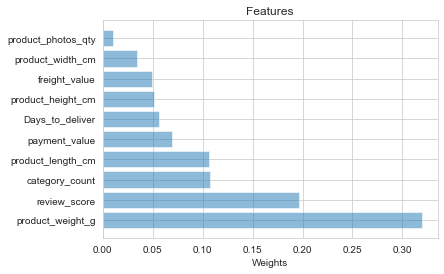

In [103]:
objects = top15_feautures.iloc[:,0]
y_pos = np.arange(len(objects))
performance = top15_feautures.iloc[:,1]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Weights')
plt.title('Features')
 
plt.show()

# Hyper Parameter Tuning

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [130,140,150,160],
    'max_features': ['auto'],
    'min_samples_leaf': [3,4,5,6],
    'min_samples_split': [2,3,4,5,8],
    'n_estimators': [70,80,90,100]
}

In [106]:
RF_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)

In [107]:
RF_grid_model=RF_grid.fit(X_train_us, y_train_us)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  1.7min finished


In [108]:
print(RF_grid_model.best_params_)

{'bootstrap': True, 'max_depth': 140, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 70}


In [113]:
rf_tuned = RandomForestClassifier(bootstrap= True, max_depth=150, max_features='auto', min_samples_leaf=3, min_samples_split= 3, n_estimators= 70)


In [114]:
rf_tuned.fit(X_train_us, y_train_us)

RandomForestClassifier(max_depth=150, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=70)

In [115]:
cv_score_rf_tuned=cross_validate(rf_tuned,X_train_us,y=y_train_us,cv=5,scoring='accuracy')

In [116]:
print("Mean accuracy score for tuned Random forest model  :{}".format(cv_score_rf_tuned['test_score'].mean()))

Mean accuracy score for tuned Random forest model  :0.9470381231671554


In [117]:
y_pred=rf_tuned.predict(X_test)

In [118]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.01      0.97      0.01       160
           1       1.00      0.13      0.23     34335

    accuracy                           0.13     34495
   macro avg       0.50      0.55      0.12     34495
weighted avg       0.99      0.13      0.22     34495

[[  155     5]
 [29977  4358]]
0.13083055515292072


Due to under sampling of majority class many relevant information is lost due to which the model doesn't perform well on prediction of majority class.

# Oversampling the training data

In [145]:
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 42) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


After OverSampling, the shape of train_X: (160202, 10)
After OverSampling, the shape of train_y: (160202,) 

After OverSampling, counts of label '1': 80101
After OverSampling, counts of label '0': 80101


In [146]:
rf_tuned.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=150, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=70)

In [147]:
y_pred=rf_tuned.predict(X_test)

In [148]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.23      0.28       166
           1       1.00      1.00      1.00     34329

    accuracy                           0.99     34495
   macro avg       0.67      0.61      0.64     34495
weighted avg       0.99      0.99      0.99     34495

[[   38   128]
 [   70 34259]]
0.9942600376866213


In [149]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc 
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [150]:
pred=[]
for model in [rf_tuned]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Test roc-auc: 0.9063591603151223


In [151]:
pd.concat(pred,axis=1)

,0
0,1.000000
1,1.000000
2,0.971429
3,1.000000
4,1.000000
...,...
34490,0.969048
34491,1.000000
34492,1.000000
34493,0.995238


In [152]:
final_prediction

0        1.000000
1        1.000000
2        0.971429
3        1.000000
4        1.000000
           ...   
34490    0.969048
34491    1.000000
34492    1.000000
34493    0.995238
34494    1.000000
Length: 34495, dtype: float64

In [153]:

#### Calculate the ROC Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.99851190e-01, ...,
       6.14439324e-04, 2.74725275e-05, 0.00000000e+00])

In [130]:
def find_best_threshold(fpr, tpr, thresholds):
     t = thresholds[np.argmax(tpr*(1-fpr))]
 # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    #print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round())
     return t
    


In [131]:
find_best_threshold(fpr, tpr, thresholds)

0.9617063492063492

In [154]:
from sklearn.metrics import f1_score,accuracy_score
f1_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,0,1)
    f1_ls.append(f1_score(y_test, y_pred, average='weighted'))
    
    
f1_ls = pd.concat([pd.Series(thresholds), pd.Series(f1_ls)],
                        axis=1)
f1_ls.columns = ['thresholds', 'f1_score']
f1_ls.sort_values(by='f1_score', ascending=False, inplace=True)


In [155]:
f1_ls.head()

,thresholds,f1_score
0,2.000000,0.992787
1,1.000000,0.992787
2,0.999851,0.529851
3,0.999643,0.529105
4,0.999405,0.528700


In [156]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

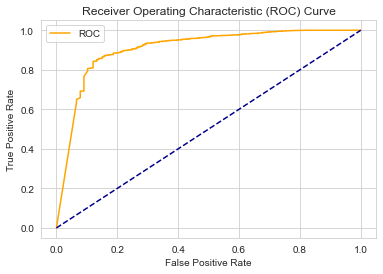

In [157]:
plot_roc_curve(fpr,tpr)

In [168]:
threshold = 0.5
#Default threshold value for the model
predicted_proba = rf_tuned.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')


In [169]:
predicted_proba [:,1]

array([1.        , 1.        , 0.97142857, ..., 1.        , 0.9952381 ,
       1.        ])

In [170]:
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print(accuracy_score(y_test, predicted))

              precision    recall  f1-score   support

           0       0.35      0.23      0.28       166
           1       1.00      1.00      1.00     34329

    accuracy                           0.99     34495
   macro avg       0.67      0.61      0.64     34495
weighted avg       0.99      0.99      0.99     34495

[[   38   128]
 [   70 34259]]
0.9942600376866213


In [171]:
print("Predicted  '1': {}".format(sum(predicted == 1))) 
print("Predicted '0': {}".format(sum(predicted == 0))) 


Predicted  '1': 34387
Predicted '0': 108


In [172]:
print("Actual  '1': {}".format(sum(y_test == 1))) 
print("Actual '0': {}".format(sum(y_test == 0))) 


Actual  '1': 34329
Actual '0': 166
